In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [200]:
results_path = '../results'
results = filter(lambda x: x.split('.')[-1]=='csv', os.listdir(results_path))

In [201]:
os.listdir(results_path)[0].split('.')[-1]

'csv'

In [202]:
final = []
for filename in results:
    df = pd.read_csv(os.path.join(results_path, filename))
    time, area = df.iloc[df.idxmax().values[1],:] - df.iloc[0,:]
    time = time/1e9
    rover_count = filename.split('.')[-2]
    final.append({'Filename': filename, 'Rovers': rover_count, 'Time': time, 'Area': area})
df = pd.DataFrame(final)

In [203]:
df.head()

,Filename,Rovers,Time,Area
0,1685835836.2856498.6.csv,6,82.657307,482155.0
1,1685827644.0616577.2.csv,2,211.680389,474310.0
2,1685827924.0183024.3.csv,3,158.254088,482155.0
3,1685835353.8433762.4.csv,4,114.911427,482154.0
4,1685827384.297062.2.csv,2,215.719175,482154.0


In [204]:
df = df.drop("Filename", axis=1)
df = df.drop("Area", axis=1)

In [206]:
df = df.groupby(by="Rovers").mean()
df.head(n=6)

,Time
Rovers,
1,393.118024
2,212.018664
3,157.247489
4,119.616138
5,85.347181
6,85.679577


<Axes: title={'center': 'Time to explore'}, xlabel='Rovers', ylabel='Time [s]'>

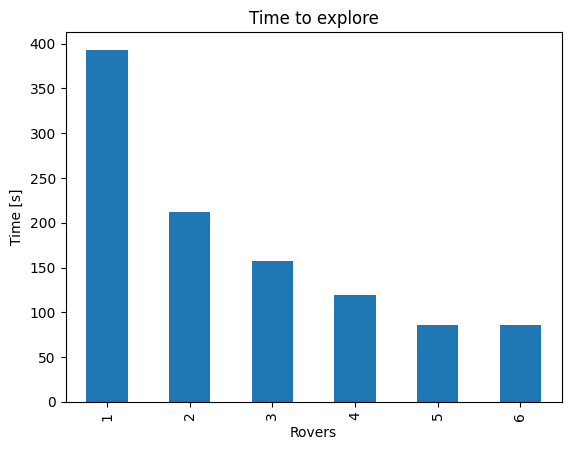

In [208]:
df.plot.bar(xlabel="Rovers", ylabel="Time [s]", title="Time to explore", legend=False)

In [88]:
rovers = list(range(1,7))
for rover_count in rovers:
    print(rover_count, end=' ')
    x = 0
    for i in range(rover_count):
        x += 700//(rover_count+1)
        print(x, end=' ')
    print('')

1 350 
2 233 466 
3 175 350 525 
4 140 280 420 560 
5 116 232 348 464 580 
6 100 200 300 400 500 600 
